# Churn rate prediction among teleom customers

Importing libraries and function

In [120]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
import seaborn as sns
import scipy.stats as st
import plotly.express as  ptly
import os

Loading the dataset into a dataframe

We will load the dataset into 2 dataframe.The backup dataframe 'df_original' is for maintaining the original dataset and we will be modifying the dataframe 'df' as per our EDA and descriptive data analysis.

In [121]:
os.chdir("D:/Lambton/Sem1/AML-2214/Assignment -1")
#churning = 'D:/Lambton/Sem1/AML-2214/Assignment -1/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df_original = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [122]:
df_original.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Preprocessing and EDA

We will be doing descriptive analysis on the given dataset

The dataset contains 21 columns and 7043 rows

In [123]:
df.shape

(7043, 21)

There are total 21 columns with datatypes object(18),float64(1) and int64(2)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Checking for null values in each column.
There are no null values in the dataframe.

In [125]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Identifying the unique entries for columns with data type object

In [126]:
print("\n Gener :",df['gender'].unique())
print("\n Partner :",df['Partner'].unique())
print("\n Dependents :",df['Dependents'].unique())
print("\n PhoneService :",df['PhoneService'].unique())
print("\n MultipleLines :",df['MultipleLines'].unique())
print("\n InternetService :",df['InternetService'].unique())
print("\n OnlineSecurity :",df['OnlineSecurity'].unique())
print("\n OnlineBackup :",df['OnlineBackup'].unique())
print("\n DeviceProtection :",df['DeviceProtection'].unique())
print("\n TechSupport :",df['TechSupport'].unique())
print("\n StreamingTV :",df['StreamingTV'].unique())
print("\n StreamingMovies :",df['StreamingMovies'].unique())
print("\n Contract :",df['Contract'].unique())
print("\n PaperlessBilling :",df['PaperlessBilling'].unique())
print("\n PaymentMethod :",df['PaymentMethod'].unique())
print("\n TotalCharges :",df['TotalCharges'].unique())
print("\n Churn :",df['Churn'].unique())


 Gener : ['Female' 'Male']

 Partner : ['Yes' 'No']

 Dependents : ['No' 'Yes']

 PhoneService : ['No' 'Yes']

 MultipleLines : ['No phone service' 'No' 'Yes']

 InternetService : ['DSL' 'Fiber optic' 'No']

 OnlineSecurity : ['No' 'Yes' 'No internet service']

 OnlineBackup : ['Yes' 'No' 'No internet service']

 DeviceProtection : ['No' 'Yes' 'No internet service']

 TechSupport : ['No' 'Yes' 'No internet service']

 StreamingTV : ['No' 'Yes' 'No internet service']

 StreamingMovies : ['No' 'Yes' 'No internet service']

 Contract : ['Month-to-month' 'One year' 'Two year']

 PaperlessBilling : ['Yes' 'No']

 PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

 TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']

 Churn : ['No' 'Yes']


Move all categorical features to another dataframe called categorical_df for further analysis

In [127]:
categorical_df = df.select_dtypes(exclude=["int64","float64"])
categorical_df.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


In [128]:
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   gender            7043 non-null   object
 2   Partner           7043 non-null   object
 3   Dependents        7043 non-null   object
 4   PhoneService      7043 non-null   object
 5   MultipleLines     7043 non-null   object
 6   InternetService   7043 non-null   object
 7   OnlineSecurity    7043 non-null   object
 8   OnlineBackup      7043 non-null   object
 9   DeviceProtection  7043 non-null   object
 10  TechSupport       7043 non-null   object
 11  StreamingTV       7043 non-null   object
 12  StreamingMovies   7043 non-null   object
 13  Contract          7043 non-null   object
 14  PaperlessBilling  7043 non-null   object
 15  PaymentMethod     7043 non-null   object
 16  TotalCharges      7043 non-null   object
 17  Churn         

In [129]:
categorical_df.isnull().sum()

customerID          0
gender              0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
TotalCharges        0
Churn               0
dtype: int64

We can remove customer Id Feature as it will not provide any insight as its unique for every customers,so we cannot take into account for comparison.We will remove the feature from original dataframe df and also the categorical dataframe categorical_df.

In [130]:
del categorical_df["customerID"]
del df["customerID"]

In [131]:
categorical_df.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


# Visualization and Diagnostic analysis

C:\Users\jaseb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



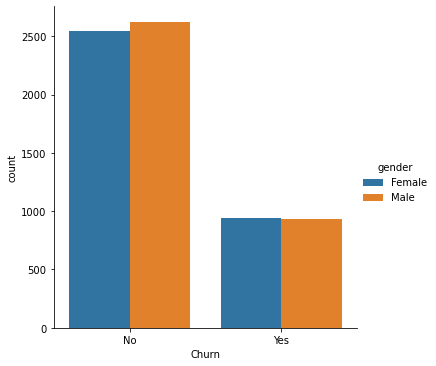

In [132]:
sns.catplot('Churn',data=df,hue='gender',kind='count')

From the given graph we can say that gender distribution among churn rate is equal in terms of leaving the service provider or continuing with the service provider.

C:\Users\jaseb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



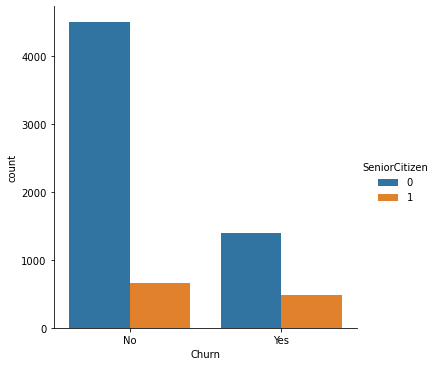

In [133]:
sns.catplot('Churn',data=df,hue='SeniorCitizen',kind='count')

From the above graph we can see that majority of the customers wwhere churn rate is "NO" are customers who come under the age bracket below 60 (not senior citizen).From this data we can say that adults and youngsters prefer to stay on with the service provider compared to senior citizens who have high chance of stopping the service with teh service provider. 

<AxesSubplot:>

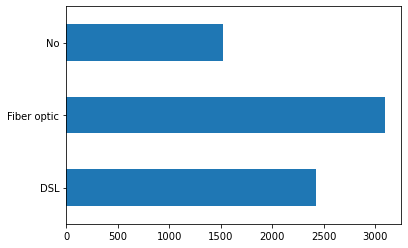

In [134]:
df['InternetService'].value_counts().sort_index().plot.barh()

From the given graph we can see that there are customers who have yet to apply for internet service from the service provider.Those section of the population can be considered potential customers for the service provider and could bring them into their service to increase market share.

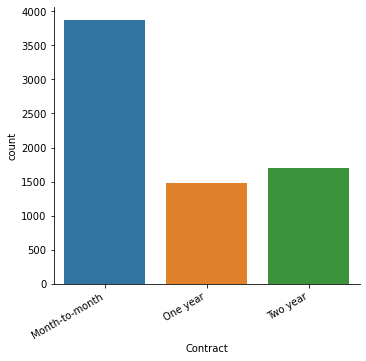

In [135]:
graph = sns.catplot(x='Contract',kind='count',data=df,orient="h")
graph.fig.autofmt_xdate()

From the above graph we can conclude that majority of the customers are prefering to opt for month to month contract rather than having a long commitment with the service provider with one or two year contract.

C:\Users\jaseb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



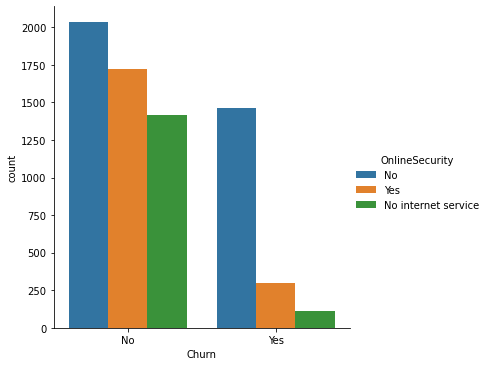

In [136]:
sns.catplot('Churn',data=df,hue='OnlineSecurity',kind='count')

We can see from the above graph that the churn rate for category "Yes" is high for customers who are not provided the online security facility.This means that customers give importance to service providers who provide onlinsecurity.

We will be using sunburn chart from plotly to investigate the data in a hierarchical format.The churn feature willbe the innermost circle which be on top of the hierarchy as we want to segments based on churn rate as to identify reasons as to why customers discontinue the service.

In [137]:
vis=ptly.sunburst(df_original.groupby(["Churn","PhoneService","Contract"]).size().reset_index(name="count"),
               path=["Churn","PhoneService","Contract"],values="count",title="Evaluating churn rate among customers")

vis.show() 

From the above chart we can see that the majority of the customers who left the service are the ones who have a phoneservice with month-to-month subscription.This shows that customers who opt for month-to-month subscriptions are likely to leave the service provider as they may be subscribed with more than 1 service provider so they might choose the ones that provide best service at lower cost.

In [138]:
vis2=ptly.sunburst(df_original.groupby(["Churn","gender","SeniorCitizen"]).size().reset_index(name="count"),
               path=["Churn","gender","SeniorCitizen"],values="count",title="Evaluating churn rate among customers")

vis2.show() 

From the above chart we can see that distribution among gender and senior citizens are the same among the customers who stop the service or continue with the service.Thus we can conclude that churn rate cannot be identified among customers based on the gender or senior citizens.

In [139]:
vis3=ptly.sunburst(df_original.groupby(["Churn","InternetService","OnlineSecurity","TechSupport"]).size().reset_index(name="count"),
               path=["Churn","InternetService","OnlineSecurity","TechSupport"],values="count",title="Evaluating churn rate among customers")

vis3.show() 

From the above chart we can see that the majority of the customers who left the service are the ones who have a interenetservice but does not have onlien security and techsupport from the service provider.The service provider can hold on to its customers if it can provide Online security and techsupport for all of its customers who have opted for interenet connection.In current times as more and more cyber crimes are being reported customers would definitely prefer services that provide them with online security against such cyber attacks.

# We are goin to implement cramers_v to identify correlation among the categorical features in the dataset

We will identify categorical features that are highly correlated and remove those features as features with high correlation provide the same value or information,so we need to select only one among them.We will filter out features with correlation greater than 0.80 or 80% and remove those features from the dataframe.

In [140]:
def cramers_v(confusion_matrix):
    chi2 = st.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

confusion_matrix = pd.crosstab(categorical_df["Churn"], categorical_df["Churn"])
cramers_v(confusion_matrix.values)

0.9996357884999413

In [141]:
column_name = []
for column in categorical_df:
    column_name.append(column)
print(column_name)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [142]:
for name in column_name:
    print("\t"+name)
    for column in categorical_df:
        confusion_matrix = pd.crosstab(categorical_df[column], categorical_df[name])
        print(column+":"+str(cramers_v(confusion_matrix.values)))
    print("\n")

	gender
gender:0.9997159640597721
Partner:0.0
Dependents:0.0
PhoneService:0.0
MultipleLines:0.0
InternetService:0.0
OnlineSecurity:0.0024159293144497946
OnlineBackup:0.0
DeviceProtection:0.0
TechSupport:0.0
StreamingTV:0.0
StreamingMovies:0.0
Contract:0.0
PaperlessBilling:0.0
PaymentMethod:0.0
TotalCharges:0.07199956136009975
Churn:0.0


	Partner
gender:0.0
Partner:0.9997156623369238
Dependents:0.4522412720806088
PhoneService:0.012438924624705569
MultipleLines:0.14291757789950507
InternetService:0.0
OnlineSecurity:0.15108346996935976
OnlineBackup:0.15241876200904667
DeviceProtection:0.16572530224148976
TechSupport:0.1265331237978345
StreamingTV:0.13631446553408547
StreamingMovies:0.12848240775699285
Contract:0.2955803913635105
PaperlessBilling:0.008414329837690013
PaymentMethod:0.16145973514918188
TotalCharges:0.13813330192711906
Churn:0.14966271044155077


	Dependents
gender:0.0
Partner:0.4522412720806088
Dependents:0.9996616269166383
PhoneService:0.0
MultipleLines:0.01859431495201778

In [143]:
for name in column_name:
    print("\t"+name)
    for column in categorical_df:
        confusion_matrix = pd.crosstab(categorical_df[column], categorical_df[name])
        v = cramers_v(confusion_matrix.values)
        if v > 0.80:
            print(column+":"+str(cramers_v(confusion_matrix.values)))
    print("\n")

	gender
gender:0.9997159640597721


	Partner
Partner:0.9997156623369238


	Dependents
Dependents:0.9996616269166383


	PhoneService
PhoneService:0.9991881428423083
MultipleLines:0.9999289848381735


	MultipleLines
PhoneService:0.9999289848381734
MultipleLines:0.9999999999999999


	InternetService
InternetService:0.9999999999999999


	OnlineSecurity
OnlineSecurity:0.9999999999999999


	OnlineBackup
OnlineBackup:0.9999999999999999


	DeviceProtection
DeviceProtection:0.9999999999999999


	TechSupport
TechSupport:0.9999999999999999


	StreamingTV
StreamingTV:0.9999999999999999


	StreamingMovies
StreamingMovies:0.9999999999999999


	Contract
Contract:0.9999999999999999


	PaperlessBilling
PaperlessBilling:0.9997059882055055


	PaymentMethod
PaymentMethod:1.0


	TotalCharges
TotalCharges:1.0000000000000018


	Churn
Churn:0.9996357884999413




We are removing the MultipleLines faeture as it is higly correlated with the feature PhoneService

In [144]:
categorical_df = categorical_df.drop(['MultipleLines'], axis = 1)


In [145]:
df = df.drop(['MultipleLines'], axis = 1)

We are removing the PaymentMethod feature as the mode of payment will not have much effect on the churn rate

In [146]:
categorical_df = categorical_df.drop(['PaymentMethod'], axis = 1)

In [147]:
df = df.drop(['PaymentMethod'], axis = 1)

In [148]:
categorical_df.head()

,gender,Partner,Dependents,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,TotalCharges,Churn
0,Female,Yes,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,29.85,No
1,Male,No,No,Yes,DSL,Yes,No,Yes,No,No,No,One year,No,1889.5,No
2,Male,No,No,Yes,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,108.15,Yes
3,Male,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,1840.75,No
4,Female,No,No,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,151.65,Yes


We are going to rename the uniques values like 'yes' and 'no' for the following features as these uniques values will be converted to feature name after we apply onehotencoding.Since there are multiple unique values 'yes' and 'no' across soem of the features,the same name wil throw and error while converting those uniques values into features during onehotencoding. 

In [149]:
categorical_df['InternetService'].replace(['No',], 'No InternetService ', inplace = True)
categorical_df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No InternetService '], dtype=object)

In [150]:
categorical_df['OnlineSecurity'].replace(['No',], 'No OnlineSecurity ', inplace = True)
categorical_df['OnlineSecurity'].replace(['Yes',], 'Yes OnlineSecurity ', inplace = True)
categorical_df['OnlineSecurity'].replace(['No internet service',], 'No internet service OnlineSecurity ', inplace = True)
categorical_df['OnlineSecurity'].unique()

array(['No OnlineSecurity ', 'Yes OnlineSecurity ',
       'No internet service OnlineSecurity '], dtype=object)

In [151]:
categorical_df['OnlineBackup'].replace(['No',], 'No OnlineBackup ', inplace = True)
categorical_df['OnlineBackup'].replace(['Yes',], 'Yes OnlineBackup ', inplace = True)
categorical_df['OnlineBackup'].replace(['No internet service',], 'No internet service OnlineBackup ', inplace = True)
categorical_df['OnlineBackup'].unique()

array(['Yes OnlineBackup ', 'No OnlineBackup ',
       'No internet service OnlineBackup '], dtype=object)

In [152]:
categorical_df['DeviceProtection'].replace(['No',], 'No DeviceProtection ', inplace = True)
categorical_df['DeviceProtection'].replace(['Yes',], 'Yes DeviceProtection ', inplace = True)
categorical_df['DeviceProtection'].replace(['No internet service',], 'No internet service DeviceProtection ', inplace = True)
categorical_df['DeviceProtection'].unique()

array(['No DeviceProtection ', 'Yes DeviceProtection ',
       'No internet service DeviceProtection '], dtype=object)

In [153]:
categorical_df['TechSupport'].replace(['No',], 'No TechSupport ', inplace = True)
categorical_df['TechSupport'].replace(['Yes',], 'Yes TechSupport ', inplace = True)
categorical_df['TechSupport'].replace(['No internet service',], 'No internet service TechSupport ', inplace = True)
categorical_df['TechSupport'].unique()

array(['No TechSupport ', 'Yes TechSupport ',
       'No internet service TechSupport '], dtype=object)

In [154]:
categorical_df['StreamingTV'].replace(['No',], 'No StreamingTV ', inplace = True)
categorical_df['StreamingTV'].replace(['Yes',], 'Yes StreamingTV ', inplace = True)
categorical_df['StreamingTV'].replace(['No internet service',], 'No internet service StreamingTV ', inplace = True)
categorical_df['StreamingTV'].unique()

array(['No StreamingTV ', 'Yes StreamingTV ',
       'No internet service StreamingTV '], dtype=object)

In [155]:
categorical_df['StreamingMovies'].replace(['No',], 'No StreamingMovies ', inplace = True)
categorical_df['StreamingMovies'].replace(['Yes',], 'Yes StreamingMovies ', inplace = True)
categorical_df['StreamingMovies'].replace(['No internet service',], 'No internet service StreamingMovies ', inplace = True)
categorical_df['StreamingMovies'].unique()

array(['No StreamingMovies ', 'Yes StreamingMovies ',
       'No internet service StreamingMovies '], dtype=object)

# Applying LabelEncoder on Categorical features

First we will apply label encoding on the categorical feature unique values as we have to convert values from string to integers,where each integer represents the unique value and those integers do not represent a set order.Only after label encoding the categorical features we can apply onehot encoding on them.

In [156]:
label_encoder = LabelEncoder()
onlineSecurity_cat = categorical_df['OnlineSecurity']
onlineSecurity_encoded = label_encoder.fit_transform(onlineSecurity_cat)
onlineSecurity_encoded

array([0, 2, 2, ..., 2, 0, 2])

In [157]:
print(onlineSecurity_encoded[0])
print(categorical_df['OnlineSecurity'][0])
print(onlineSecurity_encoded[11])
print(categorical_df['OnlineSecurity'][11])
print(onlineSecurity_encoded[1])
print(categorical_df['OnlineSecurity'][1])

0
No OnlineSecurity 
1
No internet service OnlineSecurity 
2
Yes OnlineSecurity 


In [158]:
internetService_cat = categorical_df['InternetService']
internetService_encoded = label_encoder.fit_transform(internetService_cat)
internetService_encoded

array([0, 0, 0, ..., 0, 1, 1])

In [159]:
print(internetService_encoded[0])
print(categorical_df['InternetService'][0])
print(internetService_encoded[4])
print(categorical_df['InternetService'][4])
print(internetService_encoded[11])
print(categorical_df['InternetService'][11])

0
DSL
1
Fiber optic
2
No InternetService 


In [160]:
onlineBackup_cat = categorical_df['OnlineBackup']
onlineBackup_encoded = label_encoder.fit_transform(onlineBackup_cat)
onlineBackup_encoded

array([2, 0, 2, ..., 0, 0, 0])

In [161]:
print(onlineBackup_encoded[1])
print(categorical_df['OnlineBackup'][1])
print(onlineBackup_encoded[11])
print(categorical_df['OnlineBackup'][11])
print(onlineBackup_encoded[0])
print(categorical_df['OnlineBackup'][0])

0
No OnlineBackup 
1
No internet service OnlineBackup 
2
Yes OnlineBackup 


In [162]:
deviceProtection_cat = categorical_df['DeviceProtection']
deviceProtection_encoded = label_encoder.fit_transform(deviceProtection_cat)
deviceProtection_encoded

array([0, 2, 0, ..., 0, 0, 2])

In [163]:
print(deviceProtection_encoded[0])
print(categorical_df['DeviceProtection'][0])
print(deviceProtection_encoded[11])
print(categorical_df['DeviceProtection'][11])
print(deviceProtection_encoded[1])
print(categorical_df['DeviceProtection'][1])

0
No DeviceProtection 
1
No internet service DeviceProtection 
2
Yes DeviceProtection 


In [164]:
techSupport_cat = categorical_df['TechSupport']
techSupport_encoded = label_encoder.fit_transform(techSupport_cat)
techSupport_encoded

array([0, 0, 0, ..., 0, 0, 2])

In [165]:
print(techSupport_encoded[0])
print(categorical_df['TechSupport'][0])
print(techSupport_encoded[11])
print(categorical_df['TechSupport'][11])
print(techSupport_encoded[3])
print(categorical_df['TechSupport'][3])

0
No TechSupport 
1
No internet service TechSupport 
2
Yes TechSupport 


In [166]:
streamingTV_cat = categorical_df['StreamingTV']
streamingTV_encoded = label_encoder.fit_transform(streamingTV_cat)
streamingTV_encoded

array([0, 0, 0, ..., 0, 0, 2])

In [167]:
print(streamingTV_encoded[0])
print(categorical_df['StreamingTV'][0])
print(streamingTV_encoded[11])
print(categorical_df['StreamingTV'][11])
print(streamingTV_encoded[5])
print(categorical_df['StreamingTV'][5])

0
No StreamingTV 
1
No internet service StreamingTV 
2
Yes StreamingTV 


In [168]:
streamingMovies_cat = categorical_df['StreamingMovies']
streamingMovies_encoded = label_encoder.fit_transform(streamingMovies_cat)
streamingMovies_encoded

array([0, 0, 0, ..., 0, 0, 2])

In [169]:
print(streamingMovies_encoded[0])
print(categorical_df['StreamingMovies'][0])
print(streamingMovies_encoded[11])
print(categorical_df['StreamingMovies'][11])
print(streamingMovies_encoded[5])
print(categorical_df['StreamingMovies'][5])

0
No StreamingMovies 
1
No internet service StreamingMovies 
2
Yes StreamingMovies 


In [170]:
contract_cat = categorical_df['Contract']
contract_encoded = label_encoder.fit_transform(contract_cat)
contract_encoded    

array([0, 1, 0, ..., 0, 0, 2])

In [171]:
print(contract_encoded[0])
print(categorical_df['Contract'][0])
print(contract_encoded[1])
print(categorical_df['Contract'][1])
print(contract_encoded[11])
print(categorical_df['Contract'][11])

0
Month-to-month
1
One year
2
Two year


# Applying OneHotEncoder on Label-Encoded features

In [172]:
enc_df = OneHotEncoder(categories='auto')
onlineSecurity_OneHotEncoderdf = enc_df.fit_transform(onlineSecurity_encoded.reshape(-1,1))
onlineSecurity_OneHotEncoderdf_array = onlineSecurity_OneHotEncoderdf.toarray()
onlineSecurity_DF = pd.DataFrame(onlineSecurity_OneHotEncoderdf_array, columns = ['No OnlineSecurity','No internet service OnlineSecurity', 'Yes OnlineSecurity'])
onlineSecurity_DF.head()

,No OnlineSecurity,No internet service OnlineSecurity,Yes OnlineSecurity
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0


In [173]:
internetService_OneHotEncoderdf = enc_df.fit_transform(internetService_encoded.reshape(-1,1))
internetService_OneHotEncoderdf_array = internetService_OneHotEncoderdf.toarray()
internetService_DF = pd.DataFrame(internetService_OneHotEncoderdf_array, columns = ['DSL',  'Fiber optic','No InternetService'])
internetService_DF.head()

,DSL,Fiber optic,No InternetService
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0


In [174]:
onlineBackup_OneHotEncoderdf = enc_df.fit_transform(onlineBackup_encoded.reshape(-1,1))
onlineBackup_OneHotEncoderdf_array = onlineBackup_OneHotEncoderdf.toarray()
onlineBackup_DF = pd.DataFrame(onlineBackup_OneHotEncoderdf_array, columns = ['No OnlineBackup','No internet service OnlineBackup','Yes OnlineBackup'])
onlineBackup_DF.head()

,No OnlineBackup,No internet service OnlineBackup,Yes OnlineBackup
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [175]:
deviceProtection_OneHotEncoderdf = enc_df.fit_transform(deviceProtection_encoded.reshape(-1,1))
deviceProtection_OneHotEncoderdf_array = deviceProtection_OneHotEncoderdf.toarray()
deviceProtection_DF = pd.DataFrame(deviceProtection_OneHotEncoderdf_array, columns = ['No DeviceProtection','No internet service DeviceProtection','Yes DeviceProtection'])
deviceProtection_DF.head()

,No DeviceProtection,No internet service DeviceProtection,Yes DeviceProtection
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0


In [176]:
techSupport_OneHotEncoderdf = enc_df.fit_transform(techSupport_encoded.reshape(-1,1))
techSupport_OneHotEncoderdf_array = techSupport_OneHotEncoderdf.toarray()
techSupport_DF = pd.DataFrame(techSupport_OneHotEncoderdf_array, columns = ['No TechSupport','No internet service TechSupport','Yes TechSupport'])
techSupport_DF.head()

,No TechSupport,No internet service TechSupport,Yes TechSupport
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0


In [177]:
streamingTV_OneHotEncoderdf = enc_df.fit_transform(streamingTV_encoded.reshape(-1,1))
streamingTV_OneHotEncoderdf_array = streamingTV_OneHotEncoderdf.toarray()
streamingTV_DF = pd.DataFrame(streamingTV_OneHotEncoderdf_array, columns = ['No StreamingTV','No internet service StreamingTV','Yes StreamingTV'])
streamingTV_DF.head()

,No StreamingTV,No internet service StreamingTV,Yes StreamingTV
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [178]:
streamingMovies_OneHotEncoderdf = enc_df.fit_transform(streamingMovies_encoded.reshape(-1,1))
streamingMovies_OneHotEncoderdf_array = streamingMovies_OneHotEncoderdf.toarray()
streamingMovies_DF = pd.DataFrame(streamingMovies_OneHotEncoderdf_array, columns = ['No StreamingMovies','No internet service StreamingMovies','Yes StreamingMovies'])
streamingMovies_DF.head()

,No StreamingMovies,No internet service StreamingMovies,Yes StreamingMovies
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [179]:
contract_OneHotEncoderdf = enc_df.fit_transform(contract_encoded.reshape(-1,1))
contract_OneHotEncoderdf_array = contract_OneHotEncoderdf.toarray()
contract_DF = pd.DataFrame(contract_OneHotEncoderdf_array, columns = ['Month-to-month','One year','Two year'])
contract_DF.head()

,Month-to-month,One year,Two year
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0


# Converting yes or no unigues values in object datatype features directly to 1 or 0 where 1 represents Yes and 0 represents No

In [180]:
churn = {"Churn": {"Yes": 1,"No": 0}}
df = df.replace(churn)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,29.85,29.85,0
1,Male,0,No,No,34,Yes,DSL,Yes,No,Yes,No,No,No,One year,No,56.95,1889.5,0
2,Male,0,No,No,2,Yes,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,53.85,108.15,1
3,Male,0,No,No,45,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,42.30,1840.75,0
4,Female,0,No,No,2,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,70.70,151.65,1


In [181]:
gender = {"gender": {"Female": 1,"Male": 0}}
df = df.replace(gender)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,1,0,Yes,No,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,29.85,29.85,0
1,0,0,No,No,34,Yes,DSL,Yes,No,Yes,No,No,No,One year,No,56.95,1889.5,0
2,0,0,No,No,2,Yes,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,53.85,108.15,1
3,0,0,No,No,45,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,42.30,1840.75,0
4,1,0,No,No,2,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,70.70,151.65,1


In [182]:
partner = {"Partner": {"Yes": 1,"No": 0}}
df = df.replace(partner)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,1,0,1,No,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,29.85,29.85,0
1,0,0,0,No,34,Yes,DSL,Yes,No,Yes,No,No,No,One year,No,56.95,1889.5,0
2,0,0,0,No,2,Yes,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,53.85,108.15,1
3,0,0,0,No,45,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,42.30,1840.75,0
4,1,0,0,No,2,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,70.70,151.65,1


In [183]:
dependents = {"Dependents": {"Yes": 1,"No": 0}}
df = df.replace(dependents)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,29.85,29.85,0
1,0,0,0,0,34,Yes,DSL,Yes,No,Yes,No,No,No,One year,No,56.95,1889.5,0
2,0,0,0,0,2,Yes,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,53.85,108.15,1
3,0,0,0,0,45,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,42.30,1840.75,0
4,1,0,0,0,2,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,70.70,151.65,1


In [184]:
phoneService  = {"PhoneService": {"Yes": 1,"No": 0}}
df = df.replace(phoneService)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,29.85,29.85,0
1,0,0,0,0,34,1,DSL,Yes,No,Yes,No,No,No,One year,No,56.95,1889.5,0
2,0,0,0,0,2,1,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,53.85,108.15,1
3,0,0,0,0,45,0,DSL,Yes,No,Yes,Yes,No,No,One year,No,42.30,1840.75,0
4,1,0,0,0,2,1,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,70.70,151.65,1


In [185]:
paperlessBilling   = {"PaperlessBilling": {"Yes": 1,"No": 0}}
df = df.replace(paperlessBilling)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,DSL,No,Yes,No,No,No,No,Month-to-month,1,29.85,29.85,0
1,0,0,0,0,34,1,DSL,Yes,No,Yes,No,No,No,One year,0,56.95,1889.5,0
2,0,0,0,0,2,1,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,53.85,108.15,1
3,0,0,0,0,45,0,DSL,Yes,No,Yes,Yes,No,No,One year,0,42.30,1840.75,0
4,1,0,0,0,2,1,Fiber optic,No,No,No,No,No,No,Month-to-month,1,70.70,151.65,1


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   int64  
 15  MonthlyCharges    7043 non-null   float64
 16  TotalCharges      7043 non-null   object 


The TotalCharges feature eventhough has float values the datatype of the whole feature is object which could be affect the model as we cannot consider the input values for the TotalCharges as categories as they are continous float numeral.

The feature TotalCharges also contains blank/null value column which was not shown in the info() section.This was identified when we tried to convert the feature to object type and an error occured stating that there were invalid character.Upon further investigation we found null values in TotalCharges feature.

In [187]:
df["TotalCharges"]

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [188]:
df['TotalCharges'].isnull().values.any()

False

In [189]:
exists = '  ' in df.TotalCharges
print(exists)

False


Using str.find(' ') method and passing a null string as parameter we identified that there were null values in this feature.The value 0 returned in the below indicates the match found for null string.

In [190]:
df["Indexes_TotalCharges"]= df["TotalCharges"].str.find(' ')
df["Indexes_TotalCharges"].head(491)

0     -1
1     -1
2     -1
3     -1
4     -1
      ..
486   -1
487   -1
488    0
489   -1
490   -1
Name: Indexes_TotalCharges, Length: 491, dtype: int64

In the above code section we can see that there is an empty string at row index 488 in column TotalCharges which is represented as 0

In [191]:
print("\n Indexes_TotalCharges :",df['Indexes_TotalCharges'].unique())


 Indexes_TotalCharges : [-1  0]


The work around we found is to replace the null string with 0, as it would be easier to typecast the TotalCharges feature which is currently of datatype object to float without any null values and later on apply imputation for the missing values.Its better to do imputation than deleting those rows with null values as it would lead to information loss.

In [192]:
df['TotalCharges'].replace([' ',], '0', inplace = True)


We can see that the empty string at row index 488 in column TotalCharges is converted to 0

In [193]:
df['TotalCharges'].head(491)

0        29.85
1       1889.5
2       108.15
3      1840.75
4       151.65
        ...   
486       1415
487    6201.95
488          0
489      74.35
490    6597.25
Name: TotalCharges, Length: 491, dtype: object

In [194]:
df["Indexes_TotalCharges"]= df["TotalCharges"].str.find(' ')
df["Indexes_TotalCharges"].head(491)
print("\n Indexes_TotalCharges :",df['Indexes_TotalCharges'].unique())


 Indexes_TotalCharges : [-1]


In the above code we can see that no 0 is present which means that there is no empty string present in the column.Next we will convert datatype of the column TotalCharges to float.

In [195]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], downcast="float")

We are now going to see the data description of the column data of TotalCharges to identify how to impute the null strings we replaced with 0

In [196]:
df["TotalCharges"].describe()

count    7043.000000
mean     2279.732178
std      2266.794434
min         0.000000
25%       398.549988
50%      1394.550049
75%      3786.599976
max      8684.799805
Name: TotalCharges, dtype: float64

We will impute the value 0 with mean or average value of the column TotalCharges

In [197]:
mean_TotalCharges = df["TotalCharges"].mean(axis = 0)
print("Mean value of feature TotalCharges:",mean_TotalCharges)

Mean value of feature TotalCharges: 2279.732177734375


The mean of the column TotalCharges is 2279.732177734375 which will replace 0.000000

In [198]:
df["TotalCharges"] = df["TotalCharges"].replace(to_replace =0.000000,value =mean_TotalCharges)
df.head(489)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Indexes_TotalCharges
0,1,0,1,0,1,0,DSL,No,Yes,No,No,No,No,Month-to-month,1,29.85,29.850000,0,-1
1,0,0,0,0,34,1,DSL,Yes,No,Yes,No,No,No,One year,0,56.95,1889.500000,0,-1
2,0,0,0,0,2,1,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,53.85,108.150002,1,-1
3,0,0,0,0,45,0,DSL,Yes,No,Yes,Yes,No,No,One year,0,42.30,1840.750000,0,-1
4,1,0,0,0,2,1,Fiber optic,No,No,No,No,No,No,Month-to-month,1,70.70,151.649994,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,1,0,1,1,8,1,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,1,83.55,680.049988,1,-1
485,0,0,1,1,72,1,Fiber optic,No,No,No,No,No,Yes,Two year,1,84.50,6130.850098,0,-1
486,1,0,0,0,15,1,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,1,100.15,1415.000000,0,-1
487,0,0,0,0,72,1,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,1,88.60,6201.950195,0,-1


In [199]:
df = df.drop(['Indexes_TotalCharges'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,DSL,No,Yes,No,No,No,No,Month-to-month,1,29.85,29.850000,0
1,0,0,0,0,34,1,DSL,Yes,No,Yes,No,No,No,One year,0,56.95,1889.500000,0
2,0,0,0,0,2,1,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,53.85,108.150002,1
3,0,0,0,0,45,0,DSL,Yes,No,Yes,Yes,No,No,One year,0,42.30,1840.750000,0
4,1,0,0,0,2,1,Fiber optic,No,No,No,No,No,No,Month-to-month,1,70.70,151.649994,1


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   int64  
 15  MonthlyCharges    7043 non-null   float64
 16  TotalCharges      7043 non-null   float32


We will be concatinating the onehotencoded features with the churn_df datarame

In [201]:
churn_df = pd.concat([df, onlineSecurity_DF], axis=1, verify_integrity=True)
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,No OnlineSecurity,No internet service OnlineSecurity,Yes OnlineSecurity
0,1,0,1,0,1,0,DSL,No,Yes,No,...,No,No,Month-to-month,1,29.85,29.850000,0,1.0,0.0,0.0
1,0,0,0,0,34,1,DSL,Yes,No,Yes,...,No,No,One year,0,56.95,1889.500000,0,0.0,0.0,1.0
2,0,0,0,0,2,1,DSL,Yes,Yes,No,...,No,No,Month-to-month,1,53.85,108.150002,1,0.0,0.0,1.0
3,0,0,0,0,45,0,DSL,Yes,No,Yes,...,No,No,One year,0,42.30,1840.750000,0,0.0,0.0,1.0
4,1,0,0,0,2,1,Fiber optic,No,No,No,...,No,No,Month-to-month,1,70.70,151.649994,1,1.0,0.0,0.0


In [202]:
churn_df = pd.concat([churn_df, contract_DF], axis=1, verify_integrity=True)
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,No OnlineSecurity,No internet service OnlineSecurity,Yes OnlineSecurity,Month-to-month,One year,Two year
0,1,0,1,0,1,0,DSL,No,Yes,No,...,1,29.85,29.850000,0,1.0,0.0,0.0,1.0,0.0,0.0
1,0,0,0,0,34,1,DSL,Yes,No,Yes,...,0,56.95,1889.500000,0,0.0,0.0,1.0,0.0,1.0,0.0
2,0,0,0,0,2,1,DSL,Yes,Yes,No,...,1,53.85,108.150002,1,0.0,0.0,1.0,1.0,0.0,0.0
3,0,0,0,0,45,0,DSL,Yes,No,Yes,...,0,42.30,1840.750000,0,0.0,0.0,1.0,0.0,1.0,0.0
4,1,0,0,0,2,1,Fiber optic,No,No,No,...,1,70.70,151.649994,1,1.0,0.0,0.0,1.0,0.0,0.0


In [203]:
churn_df = pd.concat([churn_df, streamingMovies_DF], axis=1, verify_integrity=True)
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,Churn,No OnlineSecurity,No internet service OnlineSecurity,Yes OnlineSecurity,Month-to-month,One year,Two year,No StreamingMovies,No internet service StreamingMovies,Yes StreamingMovies
0,1,0,1,0,1,0,DSL,No,Yes,No,...,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0,0,0,0,34,1,DSL,Yes,No,Yes,...,0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0,0,0,0,2,1,DSL,Yes,Yes,No,...,1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0,0,0,0,45,0,DSL,Yes,No,Yes,...,0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1,0,0,0,2,1,Fiber optic,No,No,No,...,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [204]:
churn_df = pd.concat([churn_df, streamingTV_DF], axis=1, verify_integrity=True)
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,Yes OnlineSecurity,Month-to-month,One year,Two year,No StreamingMovies,No internet service StreamingMovies,Yes StreamingMovies,No StreamingTV,No internet service StreamingTV,Yes StreamingTV
0,1,0,1,0,1,0,DSL,No,Yes,No,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0,0,0,0,34,1,DSL,Yes,No,Yes,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0,0,0,0,2,1,DSL,Yes,Yes,No,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0,0,0,0,45,0,DSL,Yes,No,Yes,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1,0,0,0,2,1,Fiber optic,No,No,No,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [205]:
churn_df = pd.concat([churn_df, techSupport_DF], axis=1, verify_integrity=True)
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,Two year,No StreamingMovies,No internet service StreamingMovies,Yes StreamingMovies,No StreamingTV,No internet service StreamingTV,Yes StreamingTV,No TechSupport,No internet service TechSupport,Yes TechSupport
0,1,0,1,0,1,0,DSL,No,Yes,No,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0,0,0,0,34,1,DSL,Yes,No,Yes,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0,0,0,0,2,1,DSL,Yes,Yes,No,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0,0,0,0,45,0,DSL,Yes,No,Yes,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1,0,0,0,2,1,Fiber optic,No,No,No,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [206]:
churn_df = pd.concat([churn_df,deviceProtection_DF ], axis=1, verify_integrity=True)
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,Yes StreamingMovies,No StreamingTV,No internet service StreamingTV,Yes StreamingTV,No TechSupport,No internet service TechSupport,Yes TechSupport,No DeviceProtection,No internet service DeviceProtection,Yes DeviceProtection
0,1,0,1,0,1,0,DSL,No,Yes,No,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0,0,0,0,34,1,DSL,Yes,No,Yes,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,0,0,0,2,1,DSL,Yes,Yes,No,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0,0,0,0,45,0,DSL,Yes,No,Yes,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1,0,0,0,2,1,Fiber optic,No,No,No,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [207]:
churn_df = pd.concat([churn_df,onlineBackup_DF ], axis=1, verify_integrity=True)
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,Yes StreamingTV,No TechSupport,No internet service TechSupport,Yes TechSupport,No DeviceProtection,No internet service DeviceProtection,Yes DeviceProtection,No OnlineBackup,No internet service OnlineBackup,Yes OnlineBackup
0,1,0,1,0,1,0,DSL,No,Yes,No,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,0,34,1,DSL,Yes,No,Yes,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0,0,0,0,2,1,DSL,Yes,Yes,No,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,0,45,0,DSL,Yes,No,Yes,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1,0,0,0,2,1,Fiber optic,No,No,No,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [208]:
churn_df = pd.concat([churn_df,internetService_DF ], axis=1, verify_integrity=True)
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,Yes TechSupport,No DeviceProtection,No internet service DeviceProtection,Yes DeviceProtection,No OnlineBackup,No internet service OnlineBackup,Yes OnlineBackup,DSL,Fiber optic,No InternetService
0,1,0,1,0,1,0,DSL,No,Yes,No,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0,0,0,0,34,1,DSL,Yes,No,Yes,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0,0,0,0,2,1,DSL,Yes,Yes,No,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0,0,0,0,45,0,DSL,Yes,No,Yes,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1,0,0,0,2,1,Fiber optic,No,No,No,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


We will be dropping the features from dataframe churn_df that have been onehotencoded inorder to avoid repeating values.

In [209]:
churn_df.drop(columns=['OnlineSecurity','InternetService','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract'], inplace=True)
churn_df.shape

(7043, 34)

We are comparing the different dataframe created for this model to observe what changes have been made to between the original dataframe and the last updated dataframe.

In [210]:
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,Yes TechSupport,No DeviceProtection,No internet service DeviceProtection,Yes DeviceProtection,No OnlineBackup,No internet service OnlineBackup,Yes OnlineBackup,DSL,Fiber optic,No InternetService
0,1,0,1,0,1,0,1,29.85,29.850000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0,0,0,0,34,1,0,56.95,1889.500000,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0,0,0,0,2,1,1,53.85,108.150002,1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0,0,0,0,45,0,0,42.30,1840.750000,0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1,0,0,0,2,1,1,70.70,151.649994,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [211]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,DSL,No,Yes,No,No,No,No,Month-to-month,1,29.85,29.850000,0
1,0,0,0,0,34,1,DSL,Yes,No,Yes,No,No,No,One year,0,56.95,1889.500000,0
2,0,0,0,0,2,1,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,53.85,108.150002,1
3,0,0,0,0,45,0,DSL,Yes,No,Yes,Yes,No,No,One year,0,42.30,1840.750000,0
4,1,0,0,0,2,1,Fiber optic,No,No,No,No,No,No,Month-to-month,1,70.70,151.649994,1


In [212]:
df_original.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Finding correlation among non categorical features

Identifying correlation using seaborn heatmap

In [213]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [214]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   gender                                7043 non-null   int64  
 1   SeniorCitizen                         7043 non-null   int64  
 2   Partner                               7043 non-null   int64  
 3   Dependents                            7043 non-null   int64  
 4   tenure                                7043 non-null   int64  
 5   PhoneService                          7043 non-null   int64  
 6   PaperlessBilling                      7043 non-null   int64  
 7   MonthlyCharges                        7043 non-null   float64
 8   TotalCharges                          7043 non-null   float32
 9   Churn                                 7043 non-null   int64  
 10  No OnlineSecurity                     7043 non-null   float64
 11  No internet servi

deleting the Totalcharges feature which was of data type object and inserting the same feature whose datatype was typecasted to float32 to the dataframe df_original

In [215]:
del df_original["TotalCharges"]

In [216]:
selected_columns = churn_df[["TotalCharges"]]

In [217]:
df_original = pd.concat([df_original,selected_columns ], axis=1, verify_integrity=True)
df_original.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No,29.850000
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,No,1889.500000
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes,108.150002
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No,1840.750000
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes,151.649994


In [218]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<AxesSubplot:>

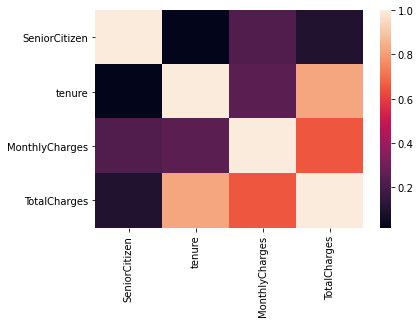

In [219]:
sns.heatmap(df_original.corr())

We are removing the feature tenure as it has high correlation with the feature TotalCharges as per sns.heatmap correlation.

In [220]:
del churn_df["tenure"]
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,No OnlineSecurity,...,Yes TechSupport,No DeviceProtection,No internet service DeviceProtection,Yes DeviceProtection,No OnlineBackup,No internet service OnlineBackup,Yes OnlineBackup,DSL,Fiber optic,No InternetService
0,1,0,1,0,0,1,29.85,29.850000,0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0,0,0,0,1,0,56.95,1889.500000,0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0,0,0,0,1,1,53.85,108.150002,1,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0,0,0,0,0,0,42.30,1840.750000,0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1,0,0,0,1,1,70.70,151.649994,1,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [221]:
churnX_df = churn_df[churn_df.columns.difference(['Churn'])]
churnX_df.head()

,DSL,Dependents,Fiber optic,Month-to-month,MonthlyCharges,No DeviceProtection,No InternetService,No OnlineBackup,No OnlineSecurity,No StreamingMovies,...,SeniorCitizen,TotalCharges,Two year,Yes DeviceProtection,Yes OnlineBackup,Yes OnlineSecurity,Yes StreamingMovies,Yes StreamingTV,Yes TechSupport,gender
0,1.0,0,0.0,1.0,29.85,1.0,0.0,0.0,1.0,1.0,...,0,29.850000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
1,1.0,0,0.0,0.0,56.95,0.0,0.0,1.0,0.0,1.0,...,0,1889.500000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
2,1.0,0,0.0,1.0,53.85,1.0,0.0,0.0,0.0,1.0,...,0,108.150002,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
3,1.0,0,0.0,0.0,42.30,0.0,0.0,1.0,0.0,1.0,...,0,1840.750000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0
4,0.0,0,1.0,1.0,70.70,1.0,0.0,1.0,1.0,1.0,...,0,151.649994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


We will be doing predictive analysis for the processed dataset

We will be predicting the churn result of a customer based on selected features.
The target variable y will be churn feature and the predictor variable will be x which contains the selected features in 
churnX_df dataframe.

In [222]:
X = churnX_df.loc[:,:]
y = churn_df.Churn

Split the data into train and test sets with test size being 20% and training size being 80%

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=100)

We will be using Logistic regression as Logistic regression is best used for predicting categorical dependant variable (in our case 0 or 1 category in churn) whereas Linear regression is best applied for models that is used for predicting continuous dependant variable which is not useful for our problem usecase.

In [224]:
model = LogisticRegression(max_iter=150,random_state=50,solver="liblinear")

In [225]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=150, random_state=50, solver='liblinear')

In [226]:
y_predict = model.predict(X_test)

We will be testing our model against random values form the churnX_df dataframe to see if the predicted value is correct.

In [227]:
test_variable = churnX_df.loc[:0,:]
test_variable

,DSL,Dependents,Fiber optic,Month-to-month,MonthlyCharges,No DeviceProtection,No InternetService,No OnlineBackup,No OnlineSecurity,No StreamingMovies,...,SeniorCitizen,TotalCharges,Two year,Yes DeviceProtection,Yes OnlineBackup,Yes OnlineSecurity,Yes StreamingMovies,Yes StreamingTV,Yes TechSupport,gender
0,1.0,0,0.0,1.0,29.85,1.0,0.0,0.0,1.0,1.0,...,0,29.85,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


In [228]:
model.predict(test_variable)

array([0], dtype=int64)

In [229]:
churn_df.loc[:0,:]

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,No OnlineSecurity,...,Yes TechSupport,No DeviceProtection,No internet service DeviceProtection,Yes DeviceProtection,No OnlineBackup,No internet service OnlineBackup,Yes OnlineBackup,DSL,Fiber optic,No InternetService
0,1,0,1,0,0,1,29.85,29.85,0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


# Evaluate our logistic regression model by examining the score of the model and genrating a classification report of our model

In [230]:
model.score(X, y)

0.7992332812721852

The model score is 79% 

In [231]:
accuracy_score(y_test, y_predict)

0.7842441447835344